# Лабораторная работа №4

ФИО:    Касрадзе Джамал Зурабович
Группа: БИВТ-21-5

Отправлять можно следующими способами:
1. Запушить этот ноутбук в GitHub в репозиторий, где у вас лежат ноутбуки с лабами

Deadlines:
- Занятие №8 в семестре (Занятие №4 очное)

Что необходимо сделать:  
- Обучить различные модели глубокого обучения на имеющихся данных  

---
## Читайте задание внимательно

Исходные данные:
1. В [табличке](https://docs.google.com/spreadsheets/d/11600OkqdRzxc-xZmFTuBs099VeAqU_GlE0Bx6bBlIRE/edit?usp=sharing) необходимо узнать название своего датасета 
2. Скачать нужны вам данные можно в [Google Drive](https://drive.google.com/drive/folders/1Phm-Fq1GL-VX7NS-DCEMRh_Fo1wU7DQ9?usp=sharing)
  
---
Теперь по пунктам, что я от вас жду:  
1. Загрузить необходимые данные к себе и считать (read) их в переменную.
2. Понять, у вас задача классификации (бинарной или многоклассовой) или регрессии.
3. Сделать предобработку данных:  
     1. Разделить выборку на тренировочную (train) и тестовую (test). _Обратите внимание, что обучать скейлеры и определять, какими значениями вы будете заполнять пропуски, вы будете на train выборке, а применять и на train, и на test_.
     2. Проверить пропуски в данных. Если они есть, заполнить одной из стратегий, предложенных в ноутбуке для семинара №3. P.S. Для численных и категориальных переменных будут разные стратегии.
     3. Отнормировать численные переменные (`StandardScaler`, `MinMaxScaler`).
     4. Закодировать категориальные признаки по одной из стратегий.
4. Оформить данные в виде класса `Dataset` из библиотеки `torch` (как мы это делали на семинаре), а затем засунуть в `Dataloader` (тоже делали на семинаре).
5. Обучить на тренировочном множестве:
     1. Очень простую однослойную нейросеть с оптимизатором `SGD` ([link](https://pytorch.org/docs/stable/optim.html)).
     2. Нейросеть посложнее (с 1 скрытым слоем) с оптимизатором `Adam` ([link](https://pytorch.org/docs/stable/optim.html)).
     3. Нейросеть еще сложнее (с 3+ скрытыми слоями) с оптимизатором `Adam` ([link](https://pytorch.org/docs/stable/optim.html)).
6. Посчитайте loss на train и test множествах, в зависимости от эпохи обучения. Провизуализируйте это с помощью библиотеки `matplotlib` (выйдет так называемая **learning curve**, кривая обучения модели).
6. Посчитайте метрики на train и test множествах:
     1. Для задачи классификации -- Accuracy
     2. Для задачи регрессии -- MAE
7. Сравните метрики относительно train/test, так и относительно разных моделей. Ответьте на следующие вопросы:
     1. Какая модель справилась лучше с поставленной задачей?
     2. Имеет ли место переобучение?
     3. Имеет ли место недообучение?
     4. Как можно улучшить метрики моделей?

---
P.S.  
Просьба -- делать каждое задание в отдельных ячейках и с отдельными заголовками (как пункт 1 и 2 в этом ноутбуке) типа  
- Заголовок
- Ячейки с кодом
- Другой заголовок
- Другие ячейки с кодом

P.S.S.  
Если вам повезло с многоклассовой классификацией, у вас не будет проблем, просто нужно будет поставить необходимое количество нейронов на выходе вашей нейросети.

## 1. Пример импорта данных. Грузим данные

In [26]:
import pandas as pd
data = pd.read_csv('../L2/dataset.csv', sep=',')  # если нужно, можно поменять разделитель
data = data.query("(PROPERTYSQFT != 2184.207862) & (PRICE < 10000000) & (PRICE > 100) & (PROPERTYSQFT < 10000) & (PROPERTYSQFT > 256)")
data.set_index("PRICE")

,BROKERTITLE,TYPE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
PRICE,,,,,,,,,,,,,,,,
315000,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,2,2.0,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
260000,Brokered by Sowae Corp,House for sale,4,2.0,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
69000,Brokered by COMPASS,Condo for sale,3,1.0,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
690000,Brokered by Sowae Corp,House for sale,5,2.0,4004.0,584 Park Pl,"Brooklyn, NY 11238","584 Park PlBrooklyn, NY 11238",United States,New York,Kings County,Brooklyn,Park Place,"584 Park Pl, Brooklyn, NY 11238, USA",40.674363,-73.958725
265000,Brokered by Pantiga Group Inc.,Co-op for sale,1,1.0,750.0,875 Morrison Ave Apt 3M,"Bronx, NY 10473","875 Morrison Ave Apt 3MBronx, NY 10473",Bronx County,The Bronx,East Bronx,Morrison Avenue,Parking lot,"Parking lot, 875 Morrison Ave #3m, Bronx, NY 1...",40.821586,-73.874089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700000,Brokered by Ilite Realty Inc,Multi-family home for sale,3,7.0,7854.0,448 40th St,"Brooklyn, NY 11232","448 40th StBrooklyn, NY 11232",United States,New York,Kings County,Brooklyn,40th Street,"448 40th St, Brooklyn, NY 11232, USA",40.651222,-74.005780
945000,Brokered by Brown Harris Stevens,Condo for sale,2,2.0,903.0,2351 Adam Clayton Powell Jr Blvd Apt 614,"Manhattan, NY 10030",2351 Adam Clayton Powell Jr Blvd Apt 614Manhat...,New York,New York County,New York,Manhattan,2351,2351 Adam Clayton Powell Jr Blvd Apartment 614...,40.816711,-73.942050
2999999,Brokered by RE MAX Edge,Multi-family home for sale,15,9.0,3600.0,2825-2827 W 15th St,"Brooklyn, NY 11224","2825-2827 W 15th StBrooklyn, NY 11224",United States,New York,Kings County,Brooklyn,West 15th Street,"2825 W 15th St, Brooklyn, NY 11224, USA",40.578450,-73.982739


## 2. Понимаем, какая перед нами задача

In [ ]:
Задача регрессии, определение цены апартаментов по площади.

## 3. Делаем предобработку данных

In [27]:
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor, Normalize, Lambda

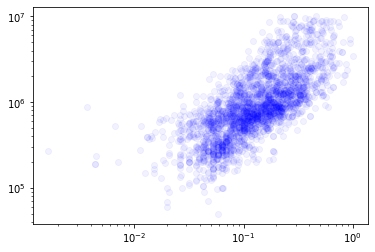

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import torch
import math
x = data['PROPERTYSQFT'].values
y = data['PRICE'].values.copy()
#разделение датасета на тестовый и тренировочный
xTR, xTE, yTR, yTE = train_test_split(x, y, test_size=0.2, random_state=17)
#Нормирование школы x
xTR_scaled = MinMaxScaler().fit_transform(xTR.reshape(-1, 1))
xTE_scaled = MinMaxScaler().fit_transform(xTE.reshape(-1, 1))
fig = plt.figure()
ax = plt.gca()
ax.plot(xTR_scaled, yTR, 'o', c='blue', alpha=0.05)
ax.set_yscale('log')
ax.set_xscale('log')


xTR_scaled = torch.tensor(xTR_scaled)
xTE_scaled = torch.tensor(xTE_scaled)
yTR = torch.tensor(yTR)
yTE = torch.tensor(yTE)

## 4. Оформить данные в виде класса Dataset
Оформить данные в виде класса Dataset из библиотеки torch (как мы это делали на семинаре), а затем засунуть в Dataloader (тоже делали на семинаре).

In [29]:
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

class MyDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __len__(self):
        return len(x)

    def __getitem__(self, idx):
        return y[idx], x[idx]
    
train = MyDataset(xTR_scaled, yTR)
test = MyDataset(xTE_scaled, yTE)    
    

train_dataloader = DataLoader(train, batch_size=1, shuffle=True)
test_dataloader = DataLoader(test, batch_size=64, shuffle=True)

## 5. Обучить на тренировочном множестве
Обучить на тренировочном множестве:

    Очень простую однослойную нейросеть с оптимизатором SGD (link).
    Нейросеть посложнее (с 1 скрытым слоем) с оптимизатором Adam (link).
    Нейросеть еще сложнее (с 3+ скрытыми слоями) с оптимизатором Adam (link).


In [33]:
#A Однослойная
from torch import nn

class NNA(nn.Module):
    def __init__(self):
        super(NNA, self).__init__()
        #self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(1, 1),
            nn.ReLU(),
            nn.Linear(1, 1),
        )
        self.double()

    def forward(self, x):
        #x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NNA()
learning_rate = 1e-3
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()
print(model)

def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

NNA(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=1, out_features=1, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1, out_features=1, bias=True)
  )
)
float64
Epoch 1
-------------------------------


RuntimeError: mat1 and mat2 must have the same dtype, but got Long and Double

In [ ]:
#B Один скрытый слой
class NNB(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(1, 256),
            nn.ReLU(),
            nn.Linear(256, 256),
            nn.ReLU(),
            nn.Linear(256, 1),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NNA()
learning_rate = 0.0001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
#C Три скрытых слоя

## 6. Посчитайте loss на train и test множествах
Посчитайте loss на train и test множествах, в зависимости от эпохи обучения. Провизуализируйте это с помощью библиотеки matplotlib (выйдет так называемая learning curve, кривая обучения модели).

## 7. Посчитать метрики на train и test множествах
Посчитайте метрики на train и test множествах:
    Для задачи регрессии -- MAE


## 8. Сравнить метрики относительно train/test
Сравните метрики относительно train/test, так и относительно разных моделей. Ответьте на следующие вопросы:

    Какая модель справилась лучше с поставленной задачей?
    Имеет ли место переобучение?
    Имеет ли место недообучение?
    Как можно улучшить метрики моделей?
